In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Data/DataPreparation.csv")
data

,Date,Open,High,Low,Close,Volume,Stocks
0,2005-07-22,1.305555,1.322385,1.304052,1.322385,301106400,AAPL
1,2005-07-25,1.322083,1.330799,1.314269,1.316674,294627200,AAPL
2,2005-07-26,1.322685,1.325690,1.303149,1.311264,268592800,AAPL
3,2005-07-27,1.317275,1.324488,1.282412,1.322083,283749200,AAPL
4,2005-07-28,1.317876,1.322385,1.301347,1.316374,251311200,AAPL
...,...,...,...,...,...,...,...
25130,2025-07-10,156.100006,159.240005,155.820007,157.690002,6732900,JNJ
25131,2025-07-11,157.089996,157.179993,155.179993,156.899994,7872000,JNJ
25132,2025-07-14,156.869995,157.470001,155.520004,156.820007,10185600,JNJ
25133,2025-07-15,156.360001,157.190002,154.800003,155.169998,6873200,JNJ


In [24]:
data.isnull().sum() #Checking Null

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Stocks    0
dtype: int64

In [25]:
data.duplicated().sum()#No Duplication

np.int64(0)

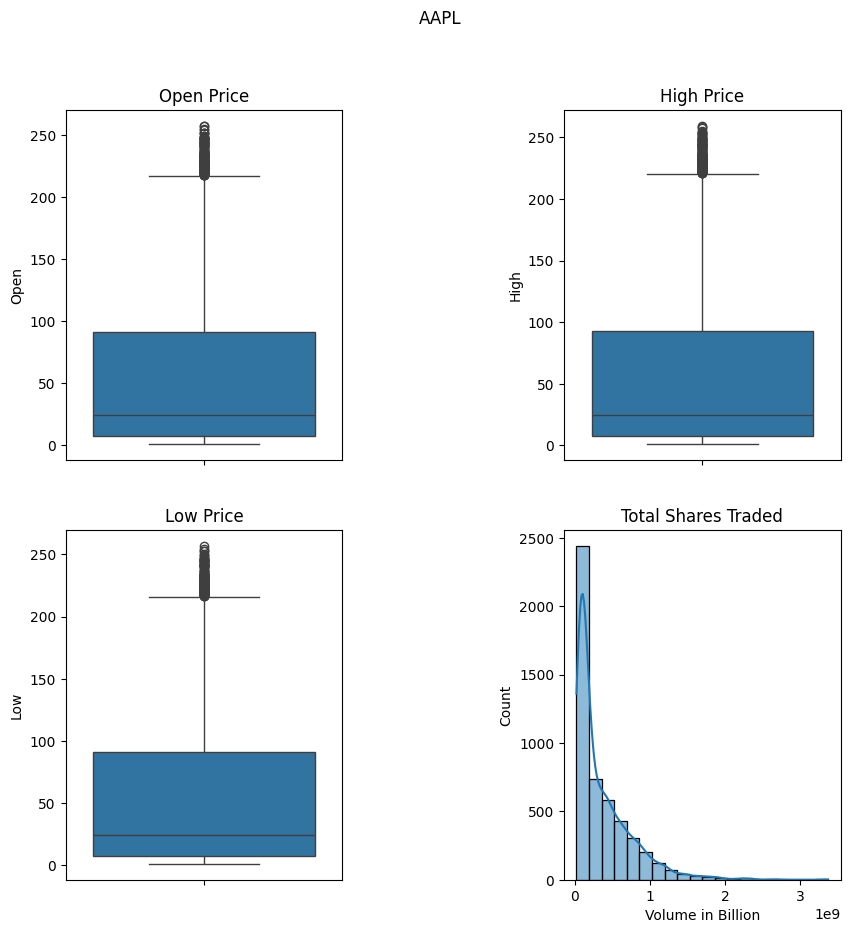

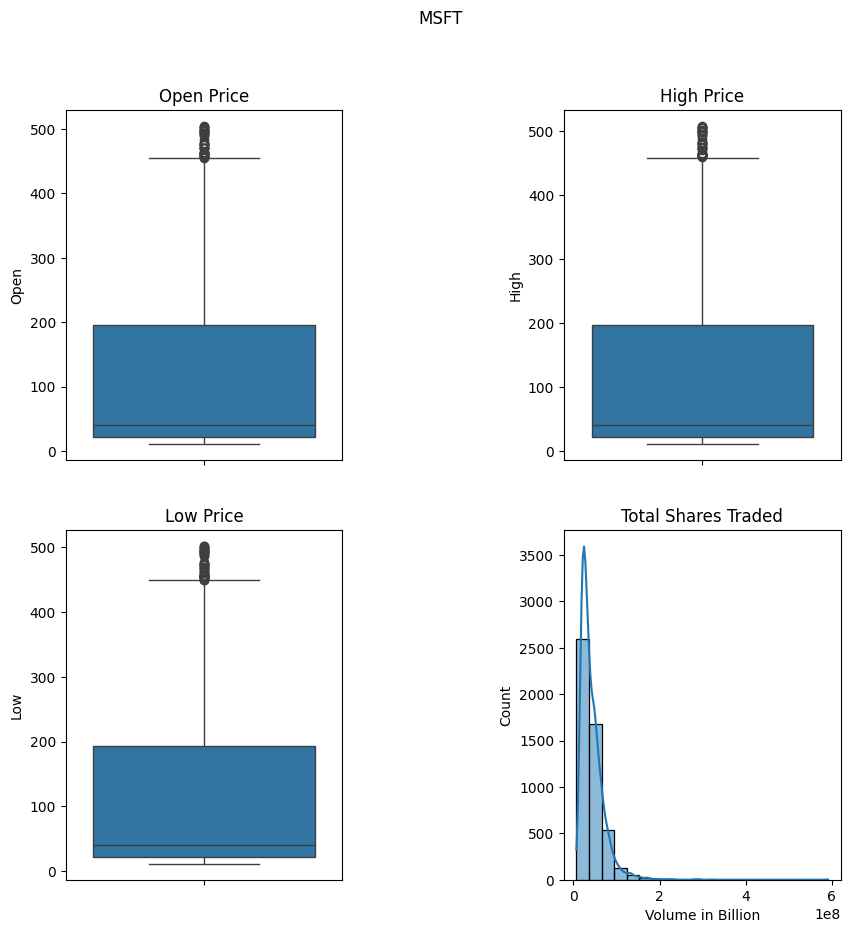

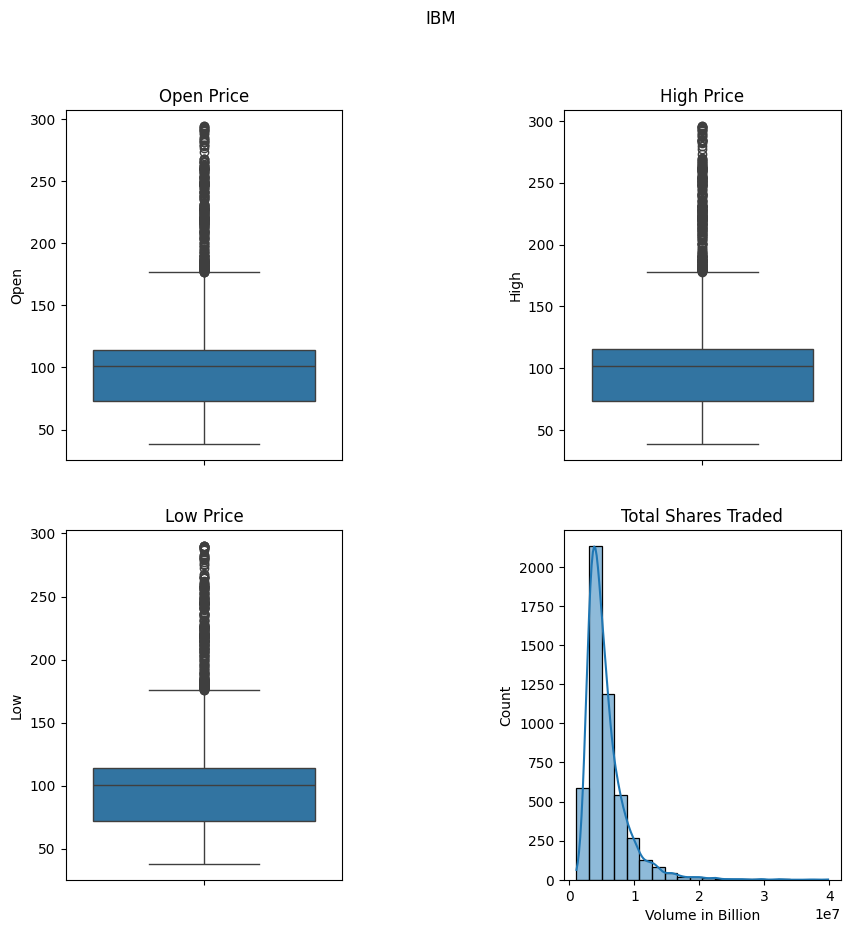

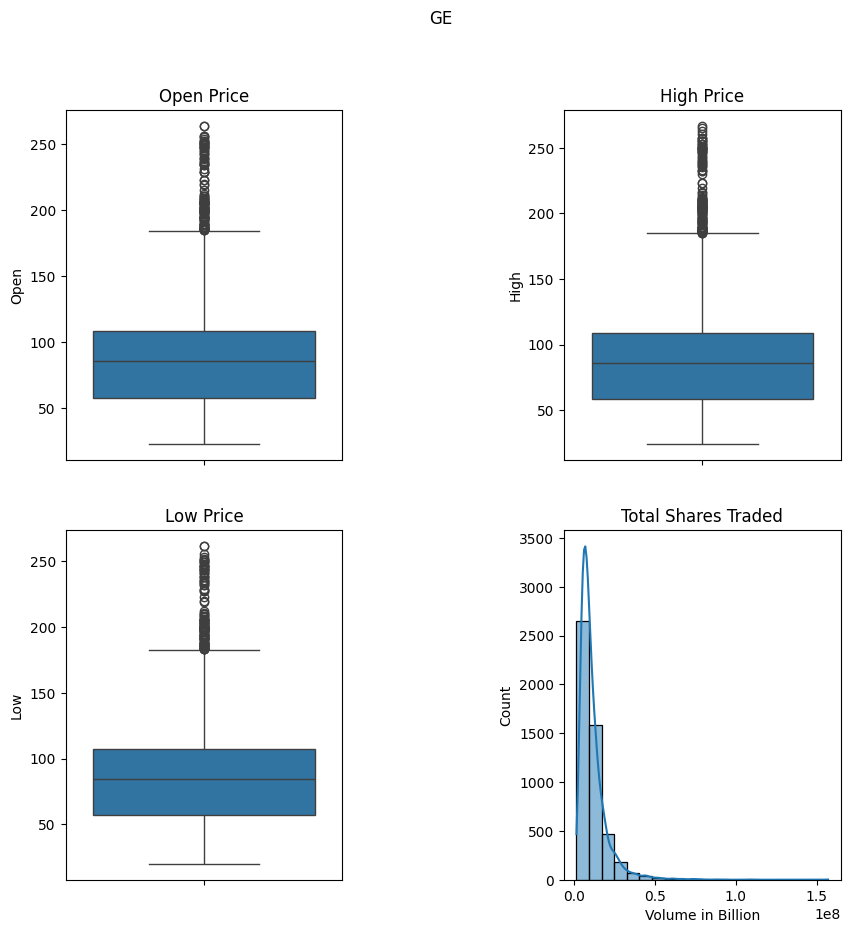

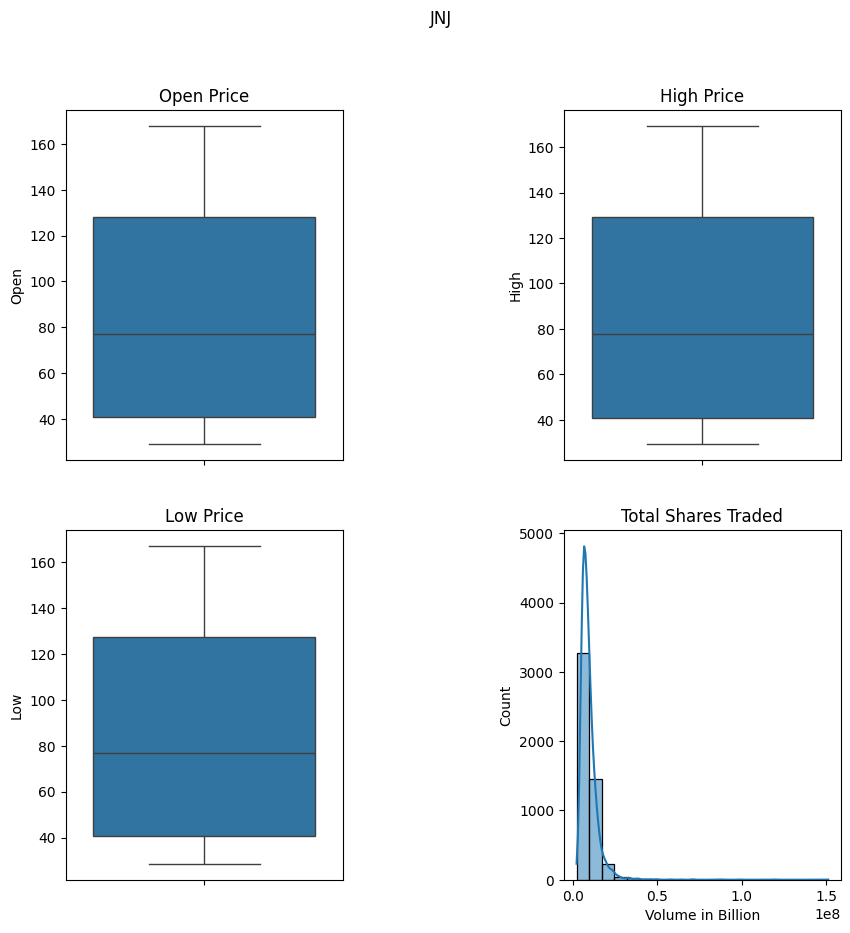

In [28]:
#Outliers Detection per stocks
for stocks in data["Stocks"].unique():
    fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
    fig.suptitle(f"{stocks}")
    plt.subplots_adjust(wspace=0.8)
    df = data[data["Stocks"]==stocks]
    sns.boxplot(df["Open"],ax=ax[0,0])
    sns.boxplot(df["High"],ax=ax[0,1])
    sns.boxplot(df["Low"],ax=ax[1,0])
    sns.histplot(df["Volume"],ax=ax[1,1],bins=20,kde=True)
    ax[0,0].set_title("Open Price")
    ax[0,1].set_title("High Price")
    ax[1,0].set_title("Low Price")
    ax[1,1].set_title("Total Shares Traded")
    ax[1,1].set_xlabel("Volume in Billion")
    # plt.savefig(f"Visuals/{stocks}_OutlierDetection",dpi=100)

In [27]:
data.describe()

,Open,High,Low,Close,Volume
count,25135.000000,25135.000000,25135.000000,25135.000000,2.513500e+04
mean,89.202614,90.015203,88.393468,89.235277,8.695512e+07
std,74.900517,75.589054,74.224085,74.956035,2.214857e+08
min,1.277002,1.292330,1.262876,1.281811,1.074765e+06
25%,37.364284,37.664559,37.025917,37.362444,6.285770e+06
50%,74.029895,74.641982,73.429242,74.055542,1.249190e+07
75%,116.011833,116.805302,115.080748,115.927738,4.992315e+07
max,505.179993,508.299988,502.790009,505.820007,3.372970e+09


In [28]:
#Renaming Stocks Names
stocks = list()
for i,j in enumerate(data["Stocks"]):
    if j=="AAPL":
        data.loc[i,"Stocks"]="Apple"
    elif j=="MSFT":
        data.loc[i,"Stocks"]="Microsoft"
    elif j=="JNJ":
        data.loc[i,"Stocks"]="Johnson&Johnson"
    elif j=="GE":
        data.loc[i,"Stocks"]="GeneralElectric"
    else:
        pass       

In [29]:
data

,Date,Open,High,Low,Close,Volume,Stocks
0,2005-07-22,1.305555,1.322385,1.304052,1.322385,301106400,Apple
1,2005-07-25,1.322083,1.330799,1.314269,1.316674,294627200,Apple
2,2005-07-26,1.322685,1.325690,1.303149,1.311264,268592800,Apple
3,2005-07-27,1.317275,1.324488,1.282412,1.322083,283749200,Apple
4,2005-07-28,1.317876,1.322385,1.301347,1.316374,251311200,Apple
...,...,...,...,...,...,...,...
25130,2025-07-10,156.100006,159.240005,155.820007,157.690002,6732900,Johnson&Johnson
25131,2025-07-11,157.089996,157.179993,155.179993,156.899994,7872000,Johnson&Johnson
25132,2025-07-14,156.869995,157.470001,155.520004,156.820007,10185600,Johnson&Johnson
25133,2025-07-15,156.360001,157.190002,154.800003,155.169998,6873200,Johnson&Johnson


In [30]:
#Arranging DataSet
Data = pd.concat([data["Stocks"],data.iloc[:,[0,1,2,3,5]],data.iloc[:,[4]]],axis=1)
Data

,Stocks,Date,Open,High,Low,Volume,Close
0,Apple,2005-07-22,1.305555,1.322385,1.304052,301106400,1.322385
1,Apple,2005-07-25,1.322083,1.330799,1.314269,294627200,1.316674
2,Apple,2005-07-26,1.322685,1.325690,1.303149,268592800,1.311264
3,Apple,2005-07-27,1.317275,1.324488,1.282412,283749200,1.322083
4,Apple,2005-07-28,1.317876,1.322385,1.301347,251311200,1.316374
...,...,...,...,...,...,...,...
25130,Johnson&Johnson,2025-07-10,156.100006,159.240005,155.820007,6732900,157.690002
25131,Johnson&Johnson,2025-07-11,157.089996,157.179993,155.179993,7872000,156.899994
25132,Johnson&Johnson,2025-07-14,156.869995,157.470001,155.520004,10185600,156.820007
25133,Johnson&Johnson,2025-07-15,156.360001,157.190002,154.800003,6873200,155.169998


In [31]:
Data.corr(numeric_only=True)

,Open,High,Low,Volume,Close
Open,1.000000,0.999904,0.999904,-0.319900,0.999808
High,0.999904,1.000000,0.999860,-0.319468,0.999908
Low,0.999904,0.999860,1.000000,-0.320382,0.999905
Volume,-0.319900,-0.319468,-0.320382,1.000000,-0.319832
Close,0.999808,0.999908,0.999905,-0.319832,1.000000


In [32]:
Data.to_csv("Data/Data-Validation.csv",index=False)

<h1><b>FINAL REPORT: DATA VALIDATION</b></h1>
<li>No Null Values Detected</li>
<li>No Duplicated Values</li>
<li>Outliers Detected in Features "open","high","low" and volume per Stocks however realistically possible in StockMarket-world applications and scenarios</li>
<li>Renamed Stocks Name but better convineince</li>
<li>Arranged Dataset for Separating Independent and Dependent Features</li>
<hr>
<b>Insights Gained:</b><br>
<b>AAPL</b>
<li>Potential Outliers in Apple StockMarket,shows right skewed graph for "High","Open","Low" i.e Values more than 200+</li>
<li>Volume shows extreme right skewed tail i.e Low Shares are  higher than 1 billion</li>
<b>MSFT</b>
<li>Potential Outliers in Microsoft StockMarket,shows right skewed graph for "High","Open","Low" i.e Values more than 450+</li>
<li>Volume shows extreme right skewed tail i.e Low Shares are traded higher than 50 Million </li>
<b>IBM</b>
<li>Extreme high Outliers in IBM StockMarket,shows an extreme right skewed range for "High","Open","Low" i.e Values more than 170+</li>
<li>Volume shows extreme right skewed tail i.e Low Shares are traded higher than 1 Million</li>
<b>GE</b>
<li>high Outliers in General Electric StockMarket similar to IBM,shows an extreme right skewed range for "High","Open","Low" i.e Values more than 170+</li>
<li>Volume shows extreme right skewed tail i.e Low Shares are traded higher than 30 Million</li>
<b>JNJ</b>
<li>No Potential Outliers Detected In JNJ</li>
<li>Volume shows extreme right skewed tail i.e Low Shares are traded higher than 20 Million</li>
<hr>
<li>Negative Correlation between Volume and other Features</li>
<li>Features are highly co-related</li>
